<a href="https://colab.research.google.com/github/giorgosstath16/AIDL_03/blob/main/Giorgos_Stathakopoulos_EDA_(mscaidl_0033).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modern Olympics Exploratory analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

In [ ]:
#load the dataset from kaggle
from google.colab import drive
drive.mount('/content/drive')

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"

%cd /content/drive/MyDrive/Kaggle

!kaggle datasets download -d heesoo37/120-years-of-olympic-history-athletes-and-results

Mounted at /content/drive
/content/drive/MyDrive/Kaggle
 92% 5.00M/5.43M [00:00<00:00, 46.4MB/s]
100% 5.43M/5.43M [00:00<00:00, 47.8MB/s]


In [ ]:
#unzip the file
!unzip \120-years-of-olympic-history-athletes-and-results.zip  -d \120-years-of-olympic-history-athletes-and-results && rm *.zip  

Archive:  120-years-of-olympic-history-athletes-and-results.zip
  inflating: 120-years-of-olympic-history-athletes-and-results/athlete_events.csv  
  inflating: 120-years-of-olympic-history-athletes-and-results/noc_regions.csv  


In [ ]:
#check the directory 
!ls

120-years-of-olympic-history-athletes-and-results
autompg
diabetes
dogs-vs-cats
iris
kaggle.json
militaryaircraftdetectiondataset
monkeypox
monkeypox-exploratory-data-analysis-for-beginners.log
mpi
titanic
top-hits-spotify-from-20002019


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Kaggle/120-years-of-olympic-history-athletes-and-results/athlete_events.csv")

In [ ]:
df.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [ ]:
df.tail()

ID                Name Sex   Age  Height  Weight      Team  NOC  \
271111  135569          Andrzej ya   M  29.0   179.0    89.0  Poland-1  POL   
271112  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271113  135570            Piotr ya   M  27.0   176.0    59.0    Poland  POL   
271114  135571  Tomasz Ireneusz ya   M  30.0   185.0    96.0    Poland  POL   
271115  135571  Tomasz Ireneusz ya   M  34.0   185.0    96.0    Poland  POL   

              Games  Year  Season            City        Sport  \
271111  1976 Winter  1976  Winter       Innsbruck         Luge   
271112  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271113  2014 Winter  2014  Winter           Sochi  Ski Jumping   
271114  1998 Winter  1998  Winter          Nagano    Bobsleigh   
271115  2002 Winter  2002  Winter  Salt Lake City    Bobsleigh   

                                           Event Medal  
271111                Luge Mixed (Men)'s Doubles   NaN  
271112  Ski Jumping Men's Large Hill, Individual   NaN  
271113        Ski Jumping Men's Large Hill, Team   NaN  
271114                      Bobsleigh Men's Four   NaN  
271115                      Bobsleigh Men's Four   NaN

In [ ]:
#number statistics of the dataset
df.describe()

ID            Age         Height         Weight  \
count  271116.000000  261642.000000  210945.000000  208241.000000   
mean    68248.954396      25.556898     175.338970      70.702393   
std     39022.286345       6.393561      10.518462      14.348020   
min         1.000000      10.000000     127.000000      25.000000   
25%     34643.000000      21.000000     168.000000      60.000000   
50%     68205.000000      24.000000     175.000000      70.000000   
75%    102097.250000      28.000000     183.000000      79.000000   
max    135571.000000      97.000000     226.000000     214.000000   

                Year  
count  271116.000000  
mean     1978.378480  
std        29.877632  
min      1896.000000  
25%      1960.000000  
50%      1988.000000  
75%      2002.000000  
max      2016.000000

In [ ]:
df.shape

(271116, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [ ]:
# also finding some probably not accurate data as the athlete
# with the highest age is 97 y.o. as its been seen from .describe() method
# and cannot been found as an athlete in a google search
df.max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


ID                                           135571
Name                                       zzet nce
Sex                                               M
Age                                            97.0
Height                                        226.0
Weight                                        214.0
Team                                           rn-2
NOC                                             ZIM
Games                                   2016 Summer
Year                                           2016
Season                                       Winter
City                                      Vancouver
Sport                                     Wrestling
Event     Wrestling Women's Middleweight, Freestyle
dtype: object

# Data preprocessing

In [ ]:
# clean duplicates
df.duplicated().sum()

1385

In [ ]:
df = df.drop_duplicates()
df.shape

(269731, 15)

In [ ]:
# check how many null values the dataset has, as it had been seen firstly from .head() & .tail() methods
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9315
Height     58814
Weight     61527
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     229959
dtype: int64

In [ ]:
# missing values per line
no_data = df.isnull().sum(1)
c1 = no_data.value_counts().keys().to_numpy()
dict_nd = {'missing values':c1 , 'number of lines w/ missing values':c2}
dict_nd = pd.DataFrame(dict_nd)
dict_nd

missing values  number of lines w/ missing values
0               1                             177098
1               3                              42463
2               0                              30181
3               2                              12414
4               4                               7575

In [ ]:
# filling the null values
df['Age'].fillna((df['Age'].mean()),inplace=True)
df['Height'].fillna((df['Height'].mean()),inplace=True)
df['Weight'].fillna((df['Weight'].mean()),inplace=True)
df['Medal'].fillna('No medal', inplace=True)
df.isnull().any()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


ID        False
Name      False
Sex       False
Age       False
Height    False
Weight    False
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal     False
dtype: bool

# 120 years of Olympics .

**Athetes, Gender and Seasons statistics.**

In [ ]:
total_athl = len(df)
men = df.where(df['Sex']=='M')
women = men.isnull().sum().ID
men = men.notnull().sum().ID
print(f'The total number of athletes in the span of 120 years of Modern Olympics is {total_athl} , {men} of which where male and {women} where female.')

The total number of athletes in the span of 120 years of Modern Olympics is 269731 , 195353 of which where male and 74378 where female.


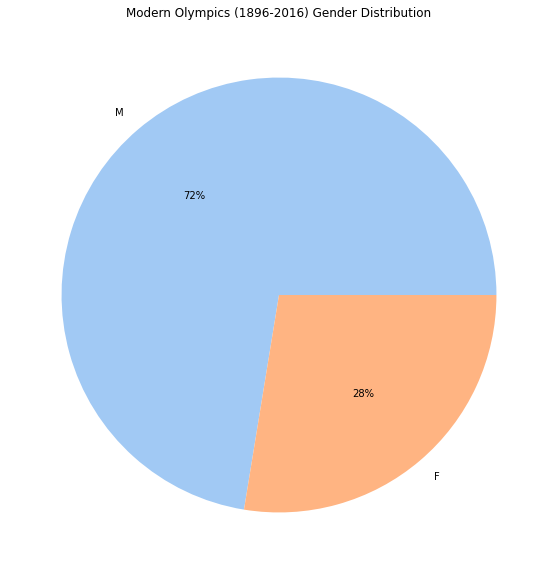

In [ ]:
plt.figure(figsize=(10,10))
colors = sns.color_palette('pastel')[0:5]
gender = df.Sex.value_counts()
plt.pie(gender, labels=gender.index ,colors = colors, autopct='%.0f%%')
plt.title('Modern Olympics (1896-2016) Gender Distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


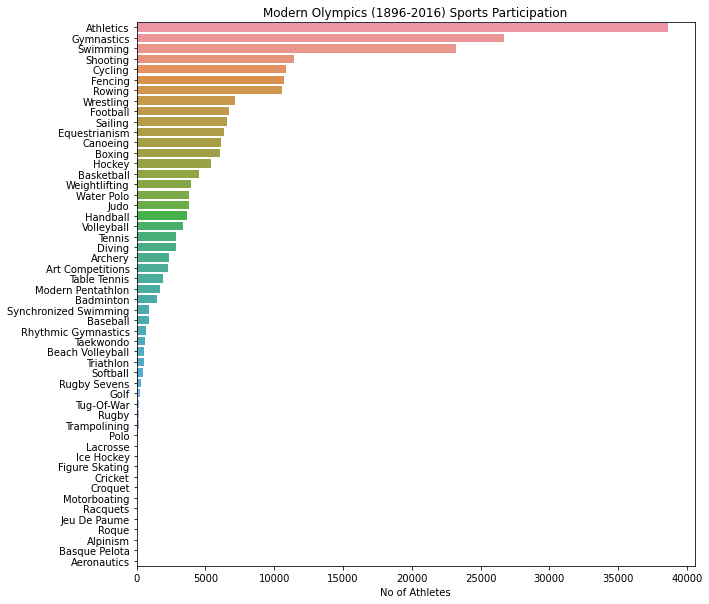

In [ ]:
summer_sports = df.query("Season == 'Summer'")['Sport'].value_counts()
plt.figure(figsize=(10,10))
colors = sns.color_palette('pastel')[0:5]
sns.barplot(summer_sports, x=summer_sports.values, y=summer_sports.index)
plt.title('Modern Olympics (1896-2016) Sports Participation')
plt.xlabel('No of Athletes')
plt.show()

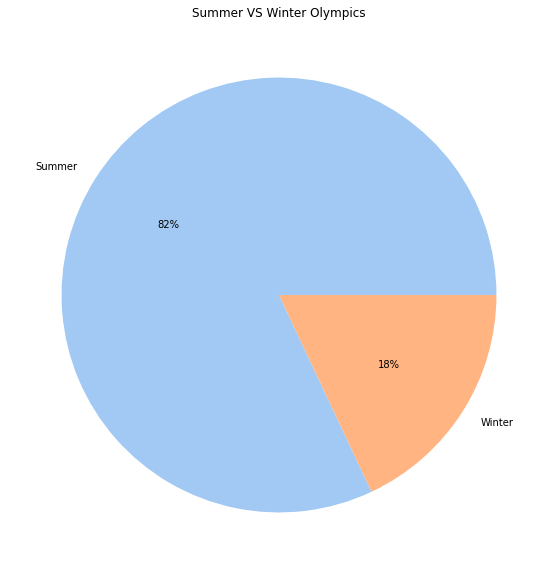

In [ ]:
plt.figure(figsize=(10,10))
colors = sns.color_palette('pastel')[0:5]
seasons = df.Season.value_counts()
plt.pie(seasons, labels=seasons.index ,colors = colors, autopct='%.0f%%')
plt.title('Summer VS Winter Olympics')
plt.show()

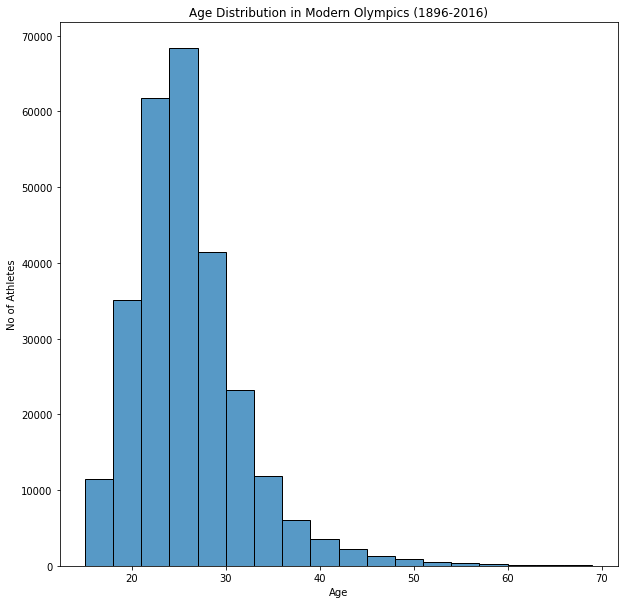

In [ ]:
plt.figure(figsize=(10,10))
sns.histplot(x='Age',data=df, palette='rocket_r',bins=np.arange(15,70,3)) 
plt.title('Age Distribution in Modern Olympics (1896-2016)')
plt.ylabel('No of Athletes')
plt.show()

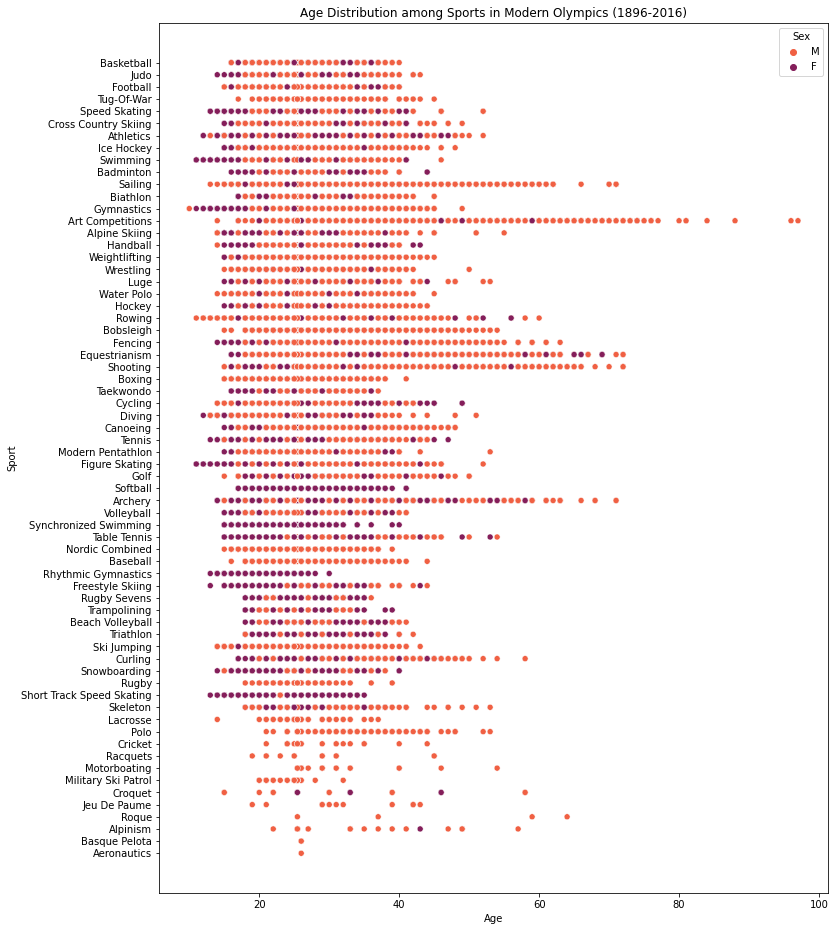

In [ ]:
plt.figure(figsize=(12,16))
sns.scatterplot(x='Age',y='Sport', hue='Sex',data=df,palette='rocket_r') 
plt.title('Age Distribution among Sports in Modern Olympics (1896-2016)')
plt.show()

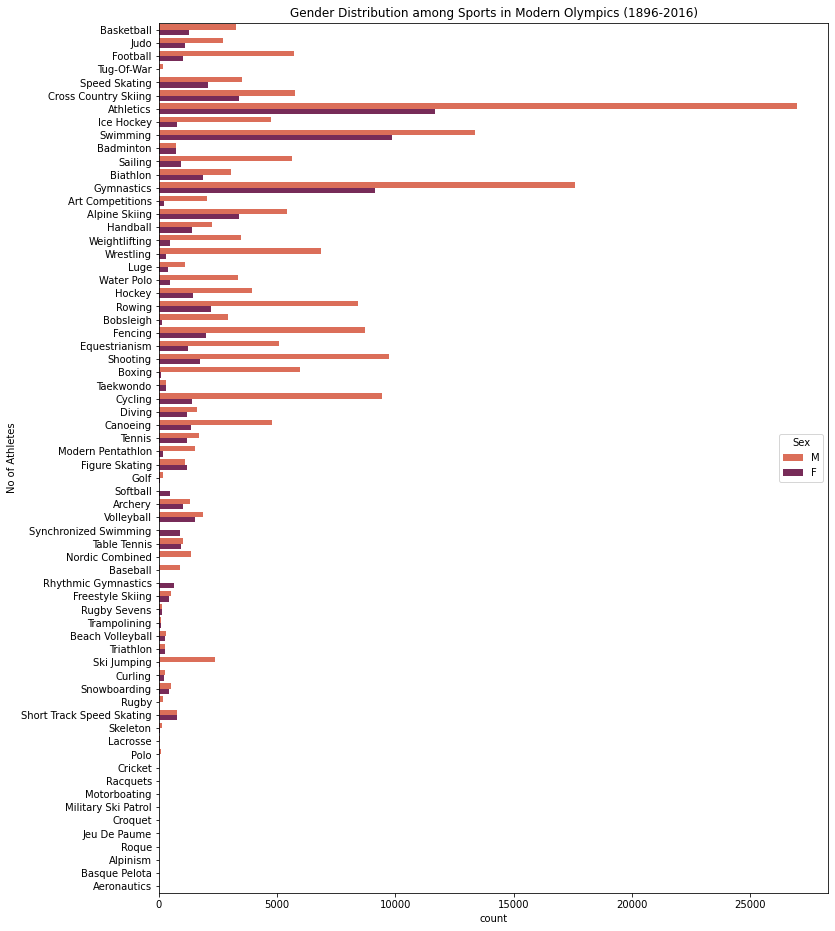

In [ ]:
plt.figure(figsize=(12,16))
sns.countplot(data=df , y='Sport', hue='Sex', palette='rocket_r') 
plt.title('Gender Distribution among Sports in Modern Olympics (1896-2016)')
plt.ylabel('No of Athletes')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]),
 <a list of 66 Text major ticklabel objects>)

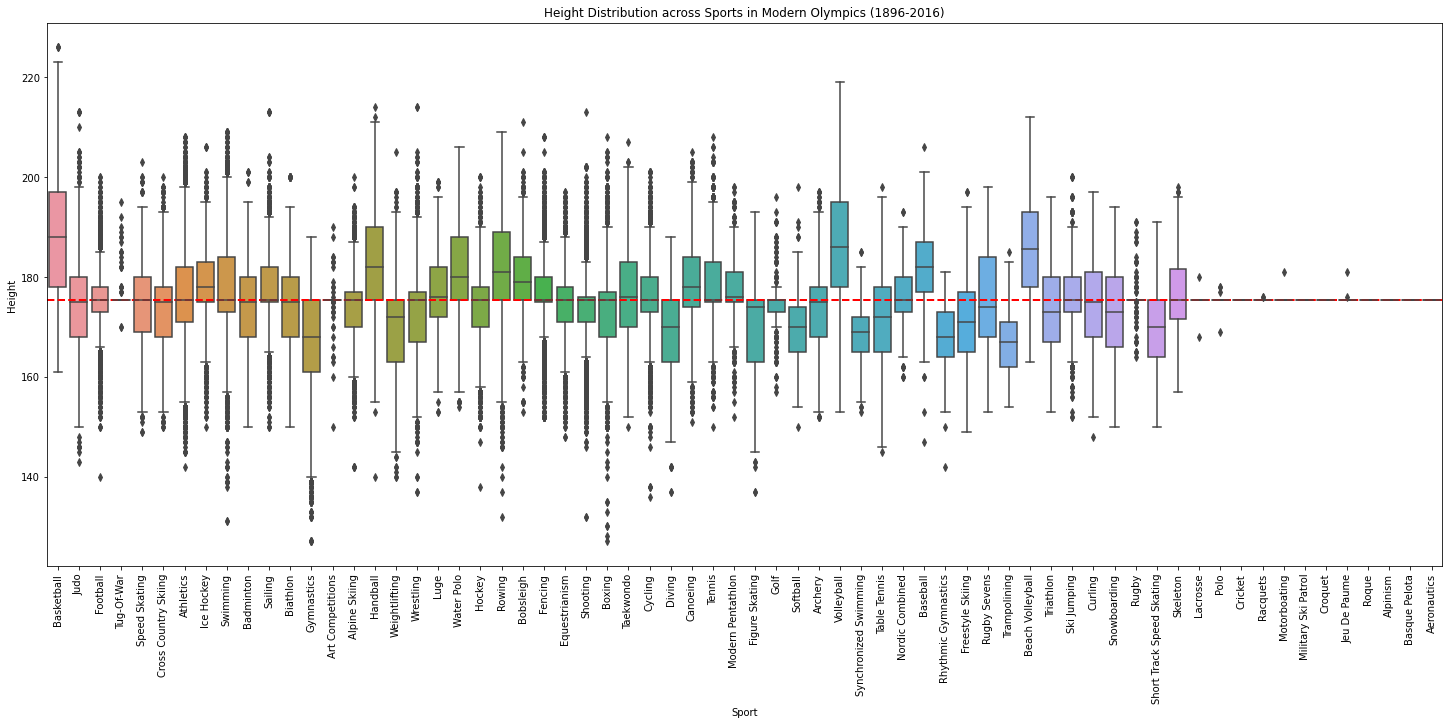

In [ ]:
plt.figure(figsize=(25,10))
sns.boxplot(x=df.Sport, y=df.Height)
plt.axhline(df.Height.mean(),color='r',linestyle='dashed',linewidth=2)
plt.title('Height Distribution across Sports in Modern Olympics (1896-2016)')
plt.xticks(rotation=90)

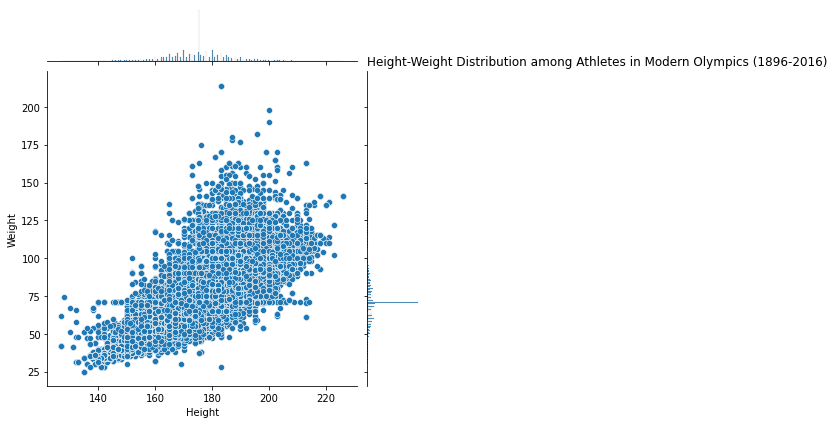

In [ ]:
sns.jointplot(x='Height',y='Weight',data=df, palette='rocket_r')
plt.title('Height-Weight Distribution among Athletes in Modern Olympics (1896-2016)', loc='left')
plt.show()

In [ ]:
fig = px.choropleth(df, locations="NOC",
                    color="Year",
                    hover_name="Team",
                    animation_frame="Year",
                    title = "Countries Participation in Modern Olympics",
                    color_continuous_scale=px.colors.sequential.PuRd)
 
 
fig["layout"].pop("updatemenus")
fig.show()